<a href="https://colab.research.google.com/github/Sezal01/machine_learning_code/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
full_data=pd.read_csv("/content/titanic.csv")

In [ ]:
#Data shape
print("Train Data : ",full_data.shape)

Train Data :  (891, 12)


In [ ]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


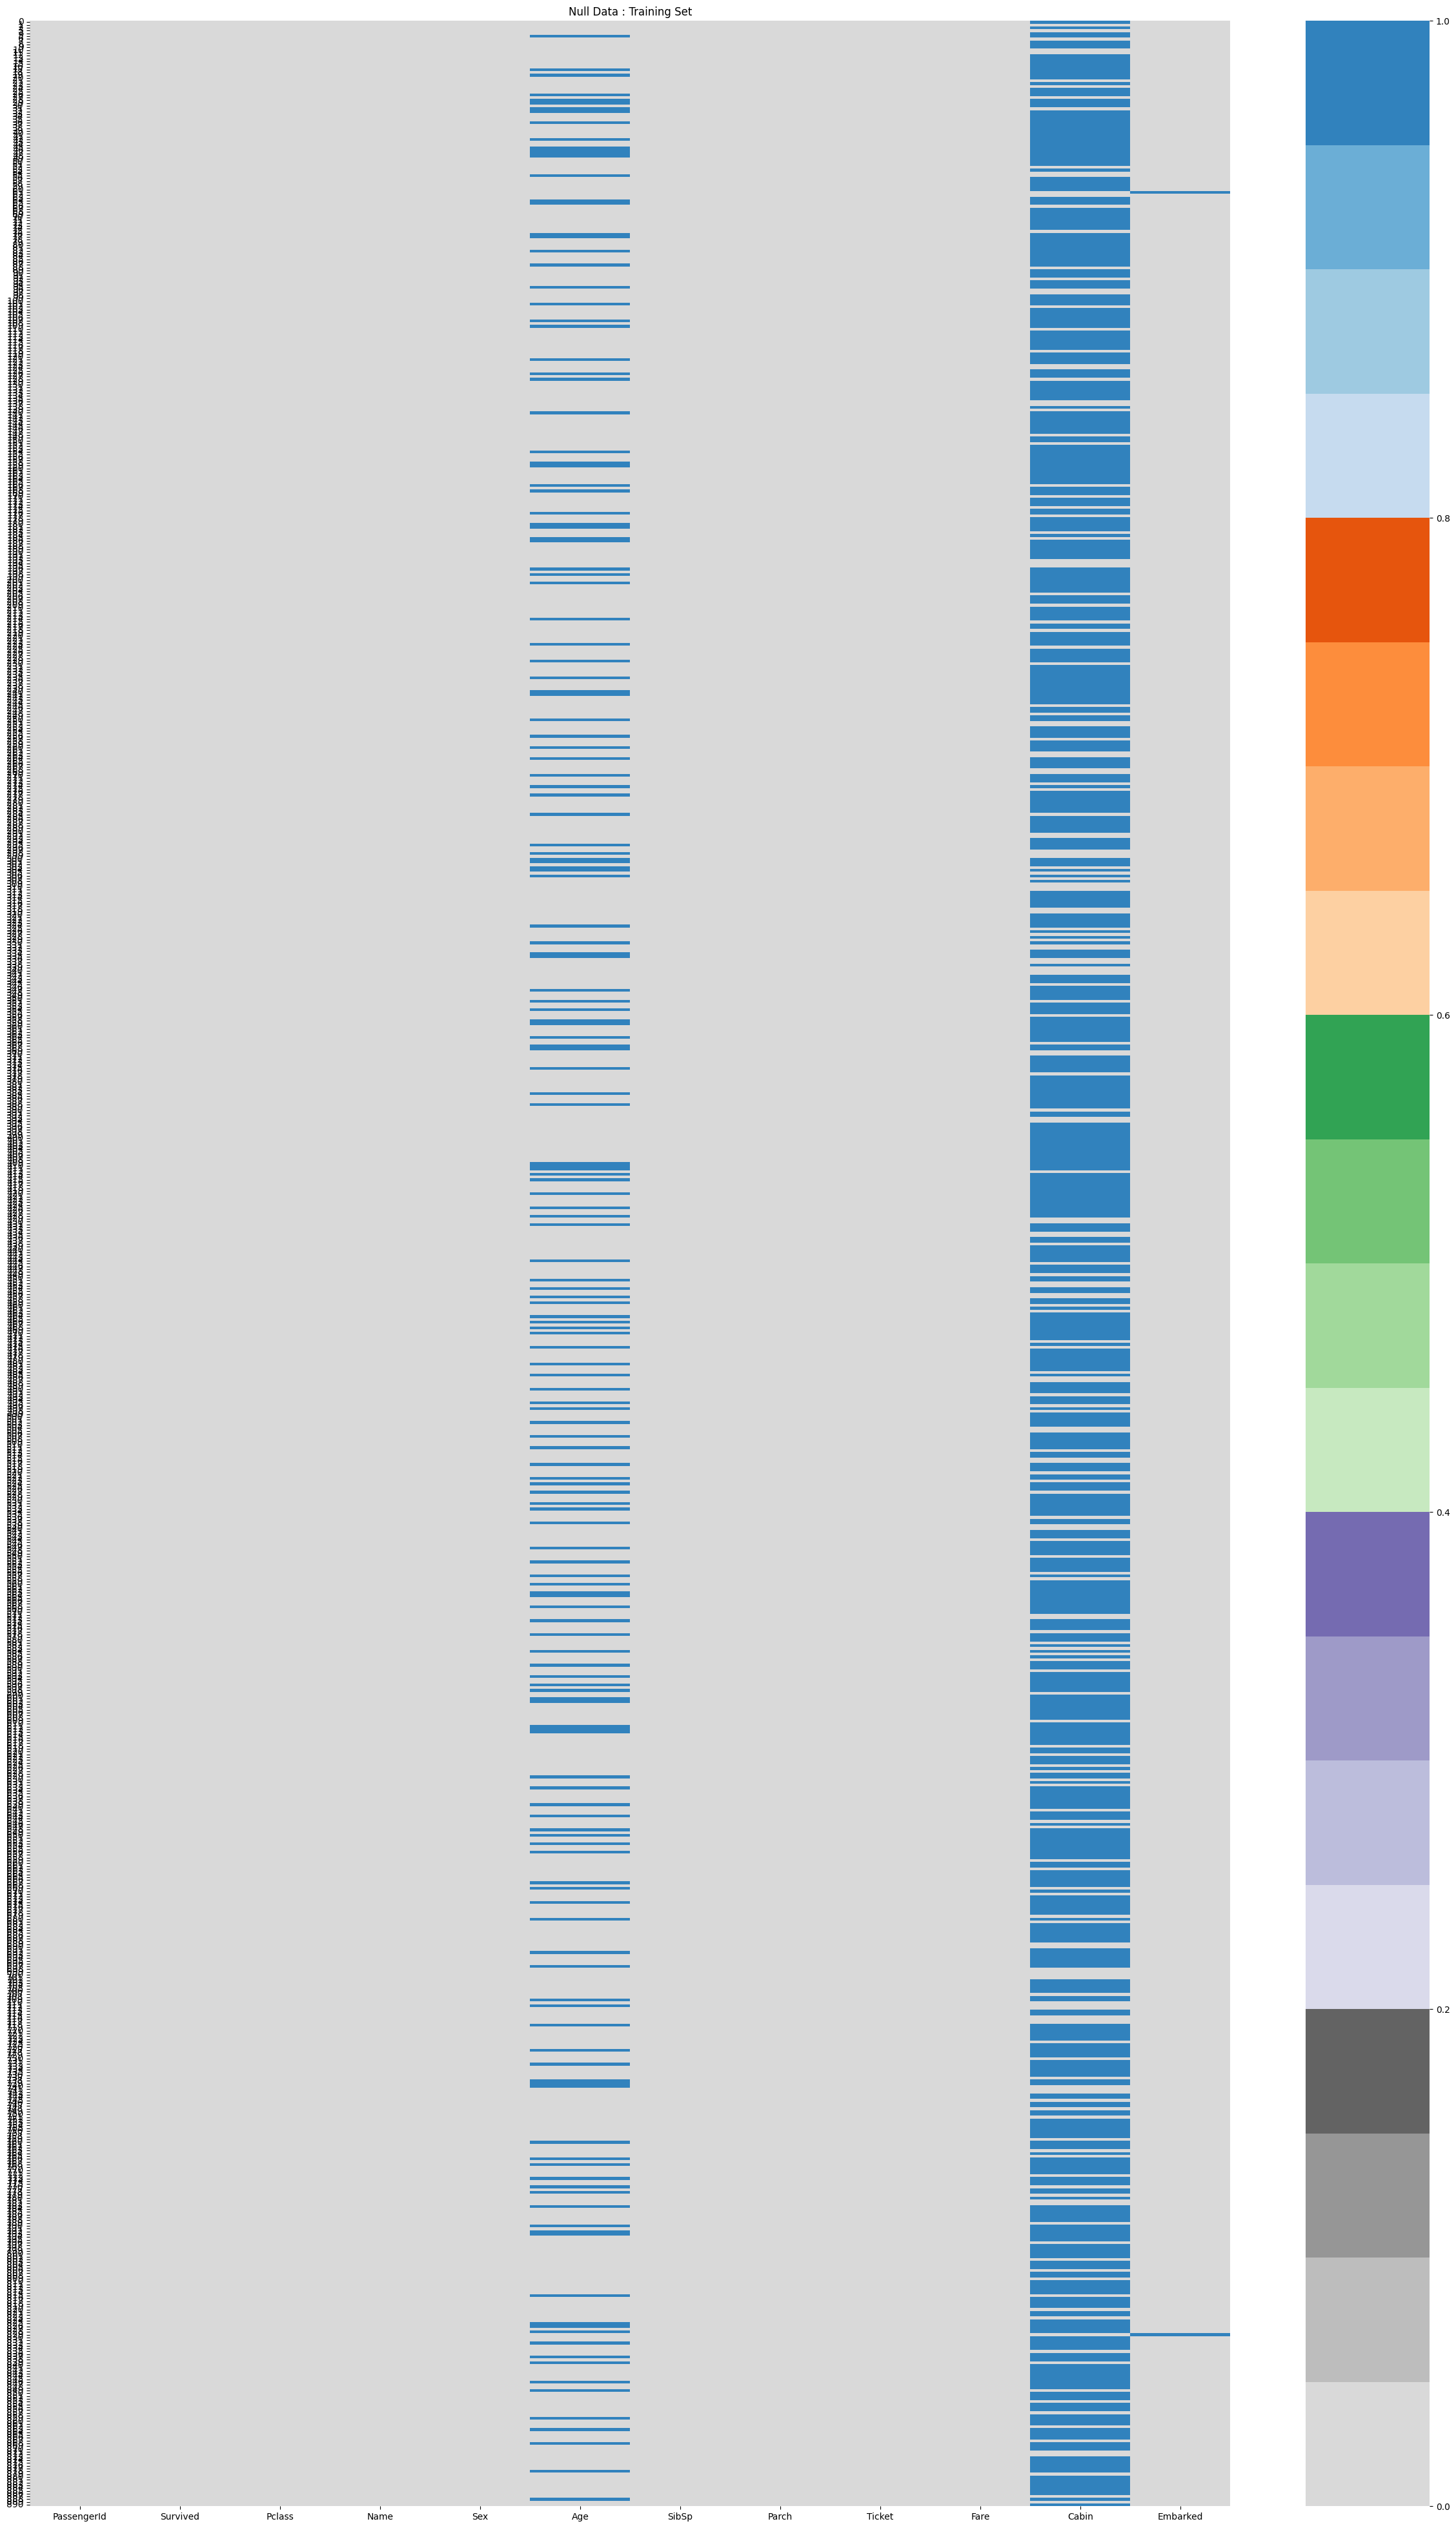

In [ ]:
#HeatMap
plt.figure(figsize=(30,50))
sns.heatmap(full_data.isnull(),yticklabels=True,cbar=True,cmap="tab20c_r")
plt.title("Null Data : Training Set")
plt.show()

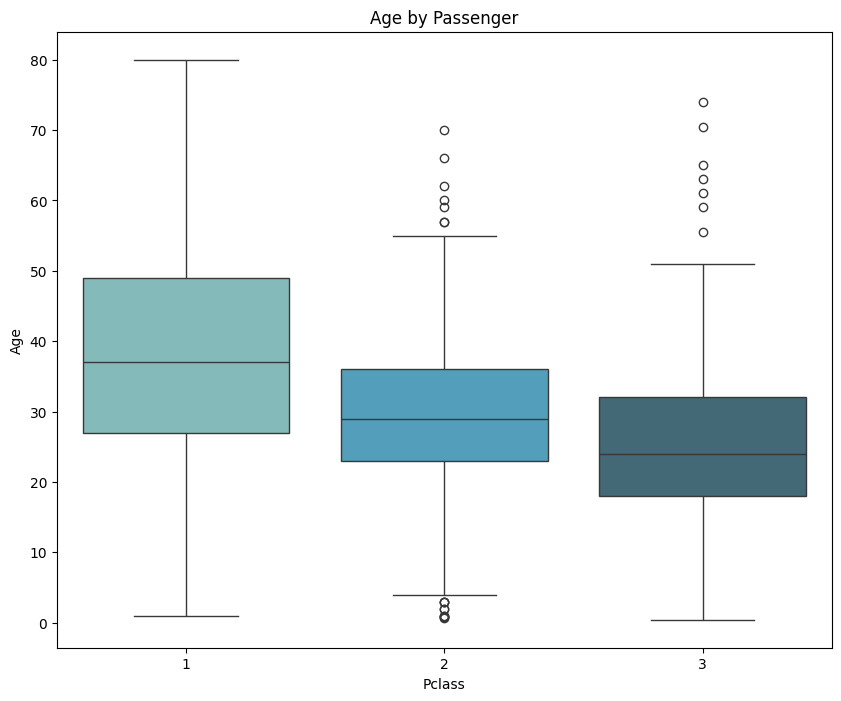

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pclass",y="Age",data=full_data, palette="GnBu_d").set_title("Age by Passenger")
plt.show()

In [ ]:
#inputation function
def inpute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return 37
    elif Pclass==2:
      return 29
    else:
      return 24
  else:
    return Age

#apply the function to the age column
full_data["Age"]=full_data[[" Age","Pclass"]].apply(inpute_age,axis=1)


In [ ]:
#remove cabin feature
full_data.drop("Cabin",axis=1, inplace=True)

In [ ]:
#remove row with missing data
full_data.dropna(inplace=True)

In [ ]:
#remove unnecesssary column
full_data.drop(["Name","Ticket"],axis=1,inplace=True)



In [ ]:
#convert objects to category data type
#objcat=["Sex","Embarked"]

#for colname in objcat:
#  full_data[colname]=full_data[colname].astype("category")

In [ ]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#remove passengerId

full_data.drop("PassengerId", inplace=True, axis=1)

In [ ]:
#getting model ready

full_data.shape

(889, 8)

In [ ]:

full_data['Sex']=full_data['Sex'].astype('category')
full_data['Embarked']=full_data['Embarked'].astype('category')
#indentify categorical festures

full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
#convert categoricla variable into "dummy" or indicator variables
sex=pd.get_dummies(full_data['Sex'], drop_first=True, dtype=int) #drop_first prevents multi-collinearity
embarked=pd.get_dummies(full_data['Embarked'],drop_first=True, dtype=int)

KeyError: 'Sex'

In [ ]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Add new dummy columns to data frame
full_data=pd.concat([full_data, sex, embarked],axis=1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
 8   male      889 non-null    int64   
 9   Q         889 non-null    int64   
 10  S         889 non-null    int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 71.4 KB


In [ ]:
#drop unecessary columns
full_data.drop(['Sex','Embarked'],axis=1, inplace=True)

#Shape of train data
print('train_data shape',full_data.shape)

#confirm changes
full_data.head()


train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
 #split data to be used in the module
#create matrix of features
x=full_data.drop(['Survived'],axis=1) # grabs everything else but "Survived"

# create target variable
y=full_data["Survived"] # y is the column we're trying to predict]

#Use x and  y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=101)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    int64  
 7   Q         889 non-null    int64  
 8   S         889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [ ]:
#fit
#import model
from sklearn.linear_model import LogisticRegression

#create instace of model
lreg=LogisticRegression()

#pass training data into model
lreg.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#predict
y_pred_lreg=lreg.predict(x_test)
print(y_pred_lreg)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]


In [ ]:
#score It
from sklearn.metrics import classification_report, accuracy_score

print("classification model")

#accuracy
print('--'*30)
logreg_accuracy=round(accuracy_score(y_test, y_pred_lreg)*100,5)
print('Accuracy',logreg_accuracy,'%')

classification model
------------------------------------------------------------
Accuracy 82.02 %
